In [49]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [50]:
ds = datasets.load_breast_cancer()
X = ds.data
Y = ds.target

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)

In [52]:
from sklearn.neighbors import KNeighborsClassifier


In [53]:
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
print(accuracy_score(Y_train_pred, Y_train))


0.974178403756


In [54]:
def fit(X_train, Y_train, K) :
    return {"data" : X_train, "target" : Y_train, "n_neighbors" : K}

def distance(X1, X2):
    return ((X1-X2)**2).sum()
from collections import Counter
def predict_single(X_test, model) :
    
    X_train = model["data"]
    Y_train = model["target"]
    
    K = model["n_neighbors"]
    
    distances = [[distance(X_train[i, :], X_test), i] for i in range(len(X_train))]
    distances = sorted(distances)
    probable_classes = [Y_train[distances[i][1]] for i in range(K)]
    #print(Counter(probable_classes))
    return Counter(probable_classes).most_common(1)[0][0]
    
def predict(X_test, model) :
    Y_pred = []
    for X in X_test :
        Y_pred.append(predict_single(X, model))
    return Y_pred


In [55]:
model = fit(X_train, Y_train, 12)
Y_train_pred = predict(X_train, model)
Y_test_pred = predict(X_test, model)
print(accuracy_score(Y_train_pred, Y_train))
print(accuracy_score(Y_test_pred, Y_test))

from sklearn.metrics import confusion_matrix, classification_report
from pprint import pprint

pprint(confusion_matrix(Y_train_pred, Y_train))
print(classification_report(Y_train_pred, Y_train))

pprint(confusion_matrix(Y_test_pred, Y_test))
print(classification_report(Y_test_pred, Y_test))


0.976525821596
0.958041958042
array([[150,   1],
       [  9, 266]], dtype=int64)
             precision    recall  f1-score   support

          0       0.94      0.99      0.97       151
          1       1.00      0.97      0.98       275

avg / total       0.98      0.98      0.98       426

array([[48,  1],
       [ 5, 89]], dtype=int64)
             precision    recall  f1-score   support

          0       0.91      0.98      0.94        49
          1       0.99      0.95      0.97        94

avg / total       0.96      0.96      0.96       143



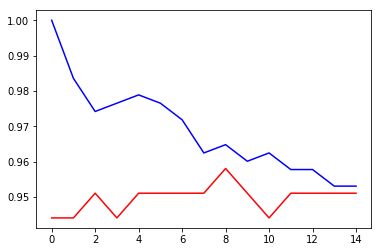

In [56]:
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []

for i in range(1, 30,2) :
    model = fit(X_train, Y_train, i)
    Y_train_pred = predict(X_train, model)
    Y_test_pred = predict(X_test, model)
    train_accuracy.append(accuracy_score(Y_train_pred, Y_train))
    test_accuracy.append(accuracy_score(Y_test_pred, Y_test))

plt.plot(train_accuracy, c = "b")
plt.plot(test_accuracy, c = "r")
plt.show()